# Data Exploration Starter
## Data Exploration Titanic: Machine Learning from Disaster
## Sorin Mihalache
## https://github.com/SorinMihalache


First thing I want to mention is that this notebook is intended to provide first glance on data and variables. You won't find here any analysis of features interrelation or feature engineering. I intentionally provide only charts that show feature related information (distribution, bar plots and etc) and feature - label relationship.

I appreciate any constructive criticism and hope my notebook will help you understand data little bit more.

In [1]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Seaborn style
sns.set_style("whitegrid")

In [2]:
### Let's import our data
train_data = pd.read_csv('../input/train.csv',index_col='PassengerId')
### and test if everything OK
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
### ... check for NAs in sense Pandas understands them
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
### Now let's prepare lists of numeric and categorical columns
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

In [5]:
### Adding new column with beautiful target names
train_data['target_name'] = train_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})

### Target Exploration

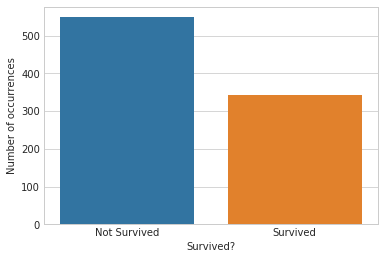

In [6]:
### Target variable exploration
sns.countplot(train_data.target_name);
plt.xlabel('Survived?');
plt.ylabel('Number of occurrences');
plt.show()

### Corralation between features (variables)

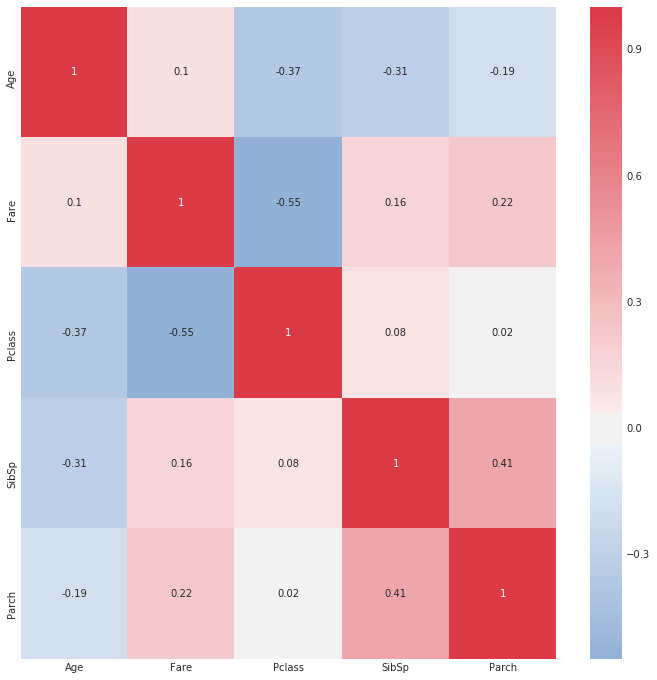

In [7]:
### Corralation matrix heatmap
# Getting correlation matrix
cor_matrix = train_data[numeric_features + ordinal_features].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

### Numeric Features Exploration

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


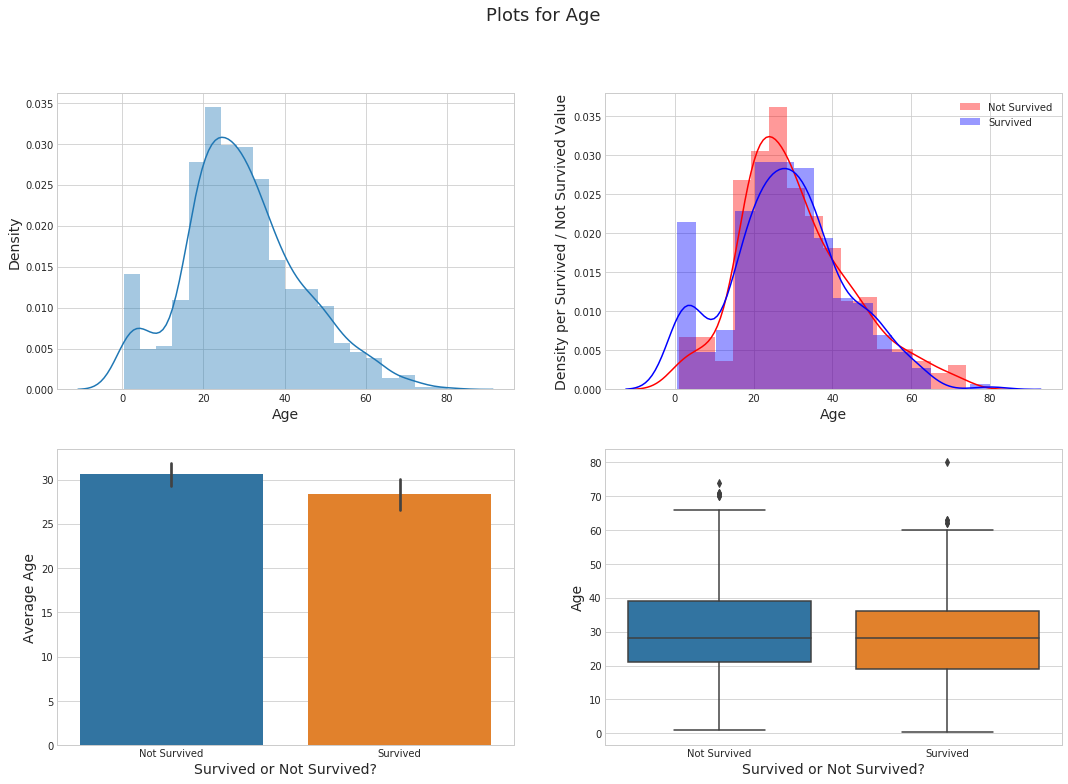

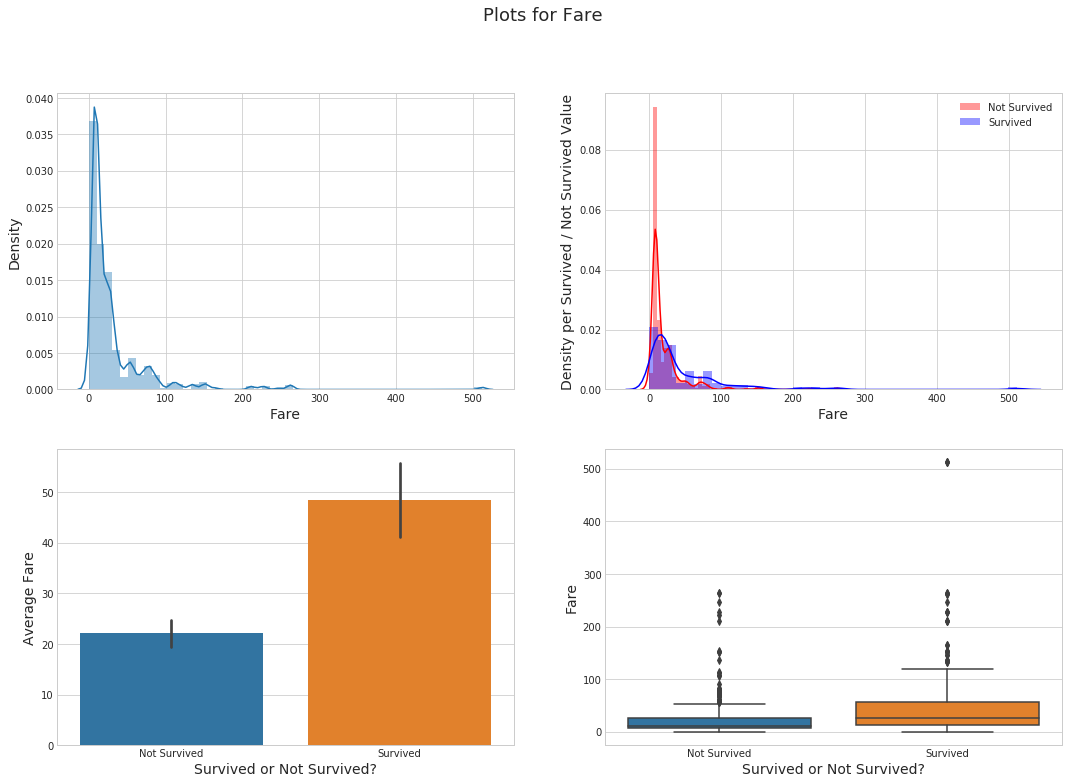

In [8]:
### Plotting Numeric Features
# Looping through and Plotting Numeric features
for column in numeric_features:    
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Distribution plot
    sns.distplot(train_data[column].dropna(), ax=plt.subplot(221));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    
    ### Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train_data.loc[train_data.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(222));
    # Survived hist
    sns.distplot(train_data.loc[train_data.Survived==1, column].dropna(),
                 color='blue', label='Survived', ax=plt.subplot(222));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    
    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(223));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    
    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(224));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

### Categorical (Ordinal) Features Exploration

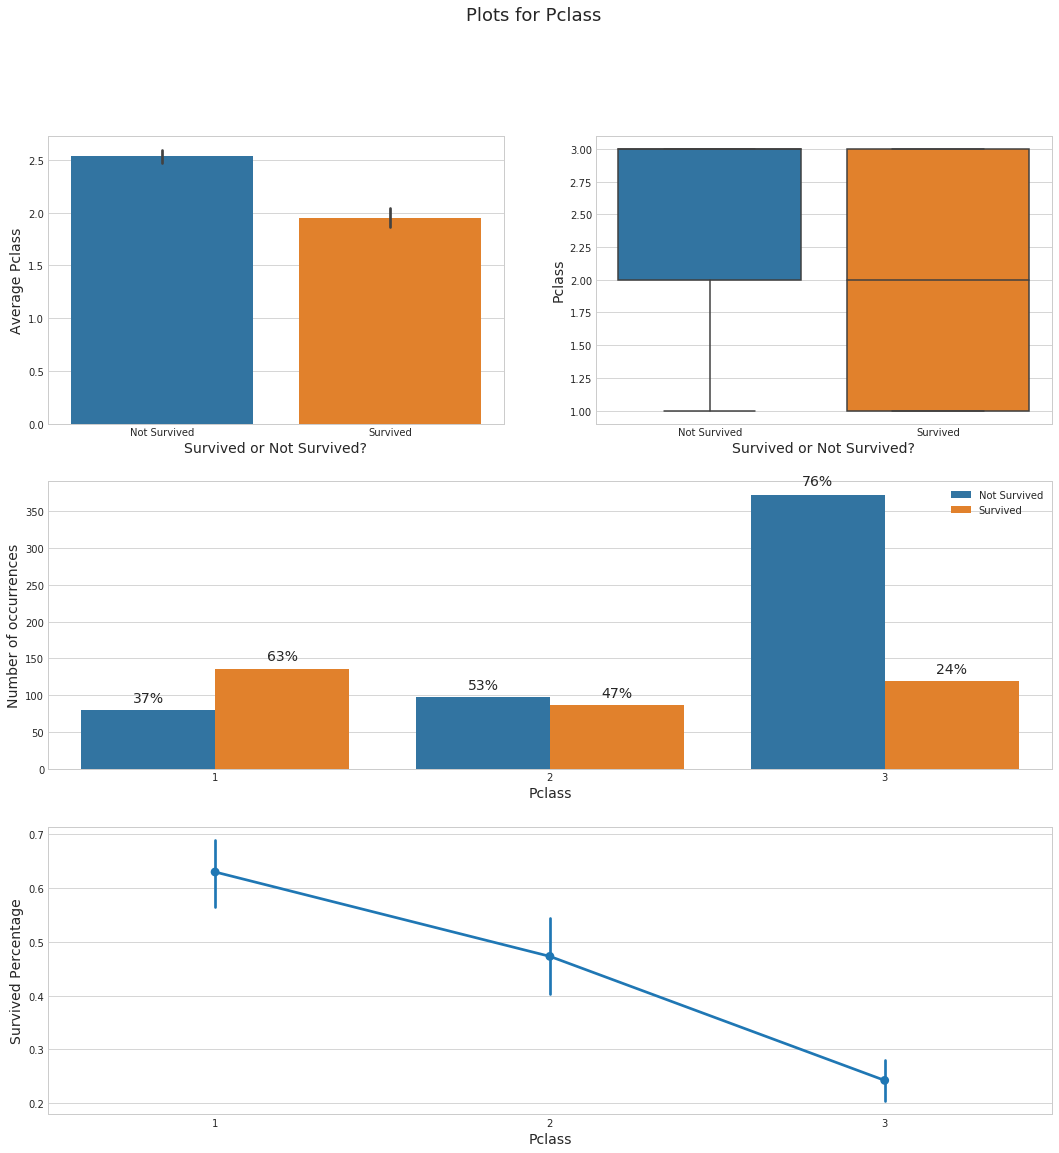

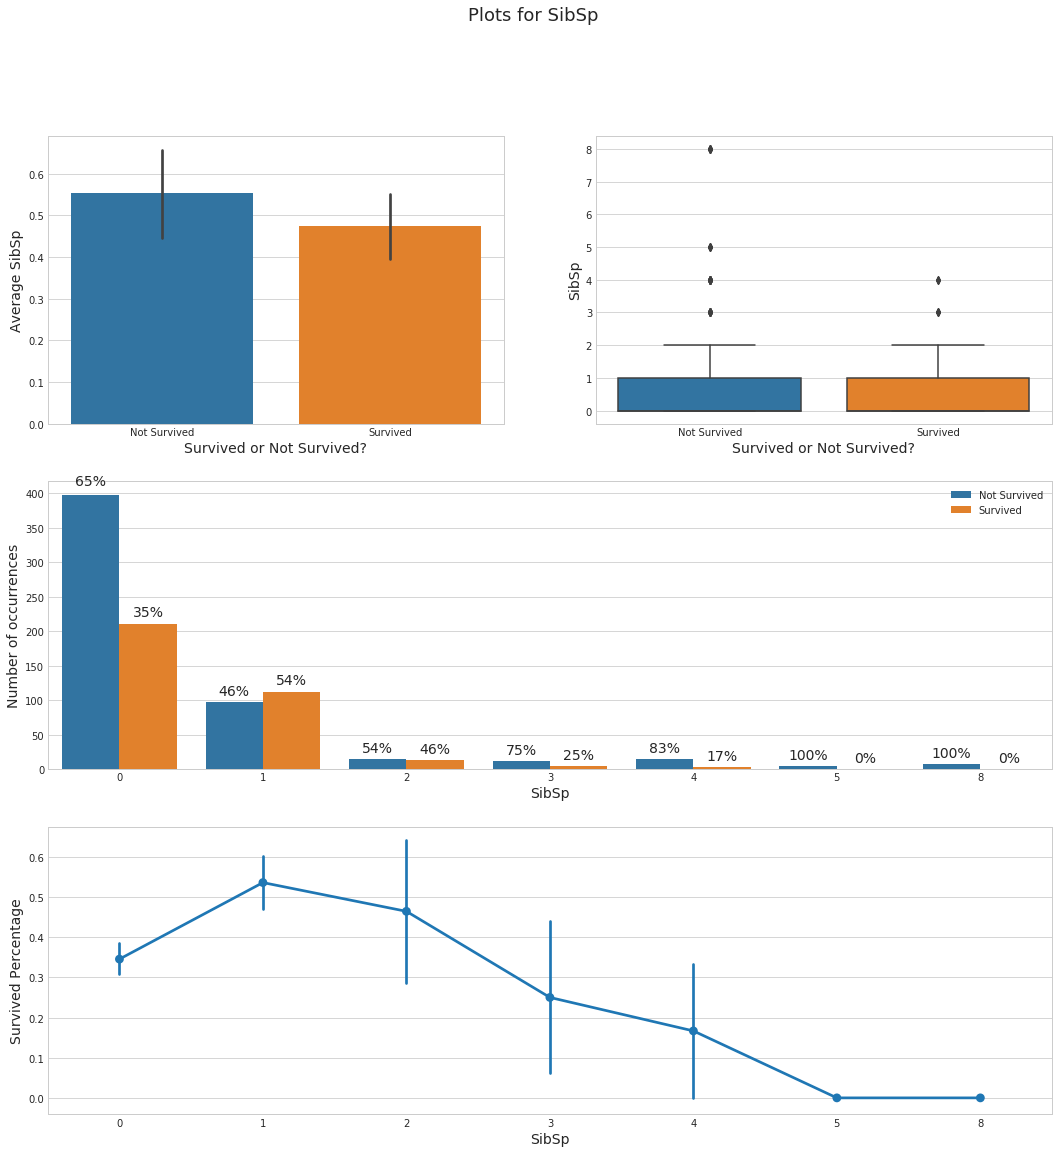

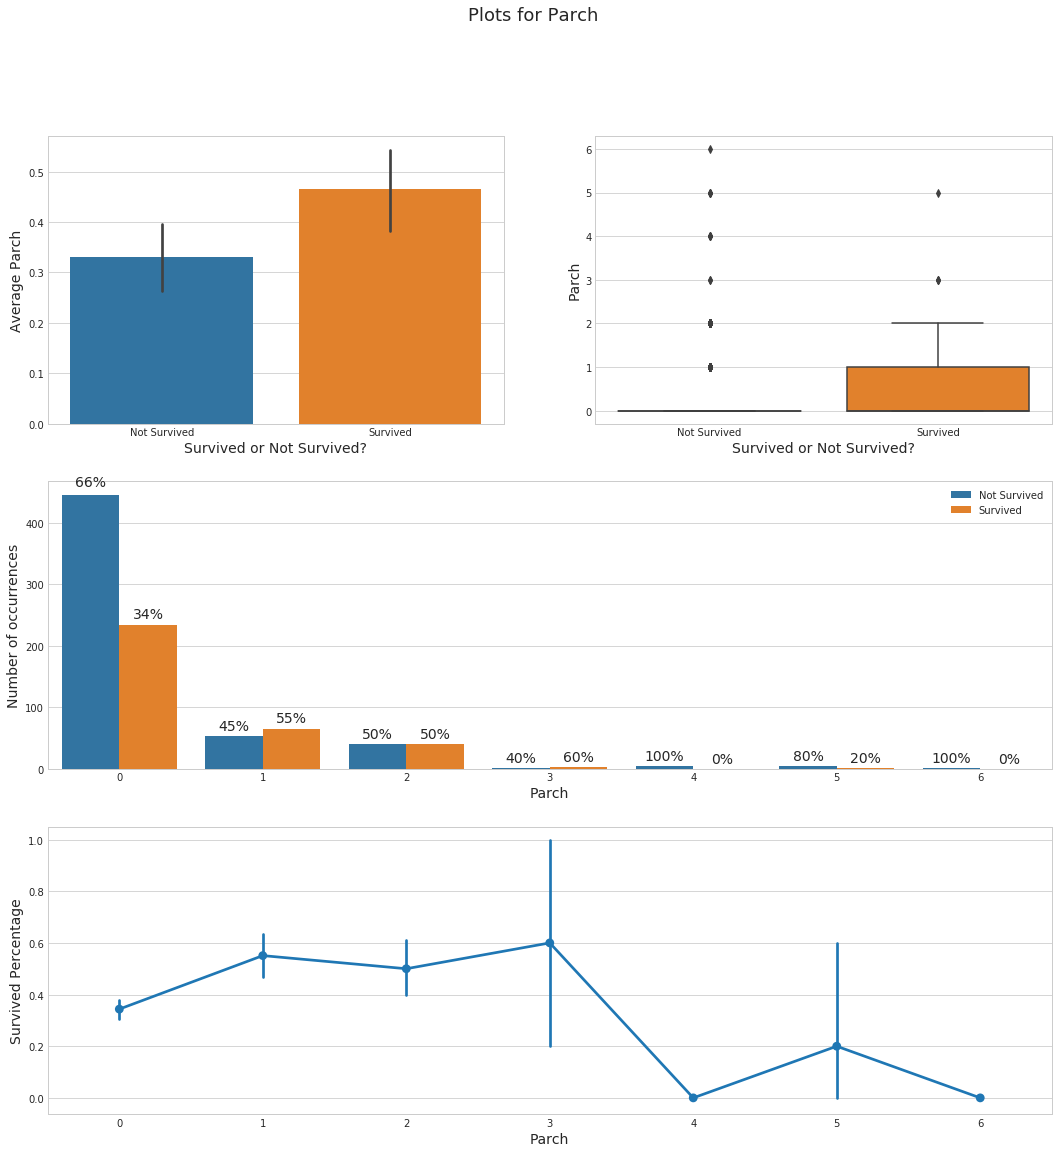

In [9]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in ordinal_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,18))

    ### Average Column value per Survived / Not Survived Value
    sns.barplot(x="target_name", y=column, data=train_data, ax=plt.subplot(321));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel('Average ' + column, fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);

    ### Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(322));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);

    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(312));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Setting Legend location 
    plt.legend(loc=1);

    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages   
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    ### Survived percentage for every value of feature
    sns.pointplot(x=column, y='Survived', data=train_data, ax = plt.subplot(313));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Survived Percentage', fontsize=14);
    # Printing Chart
    plt.show()

### Categorical (Nominal) Features Exploration

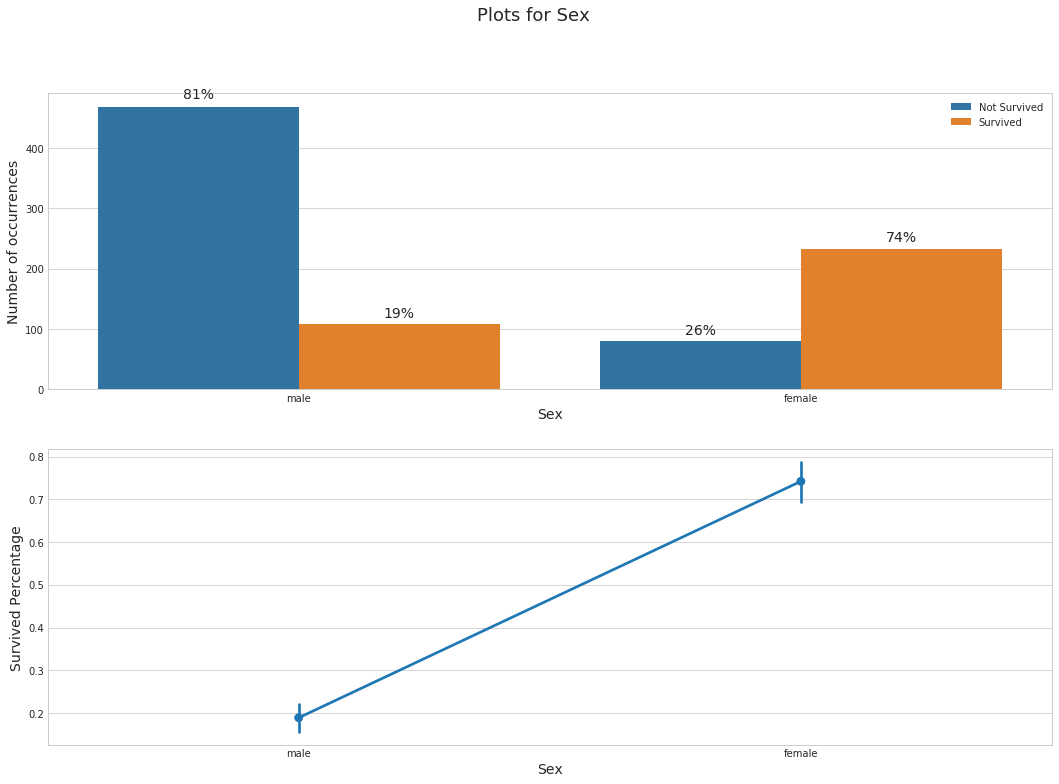

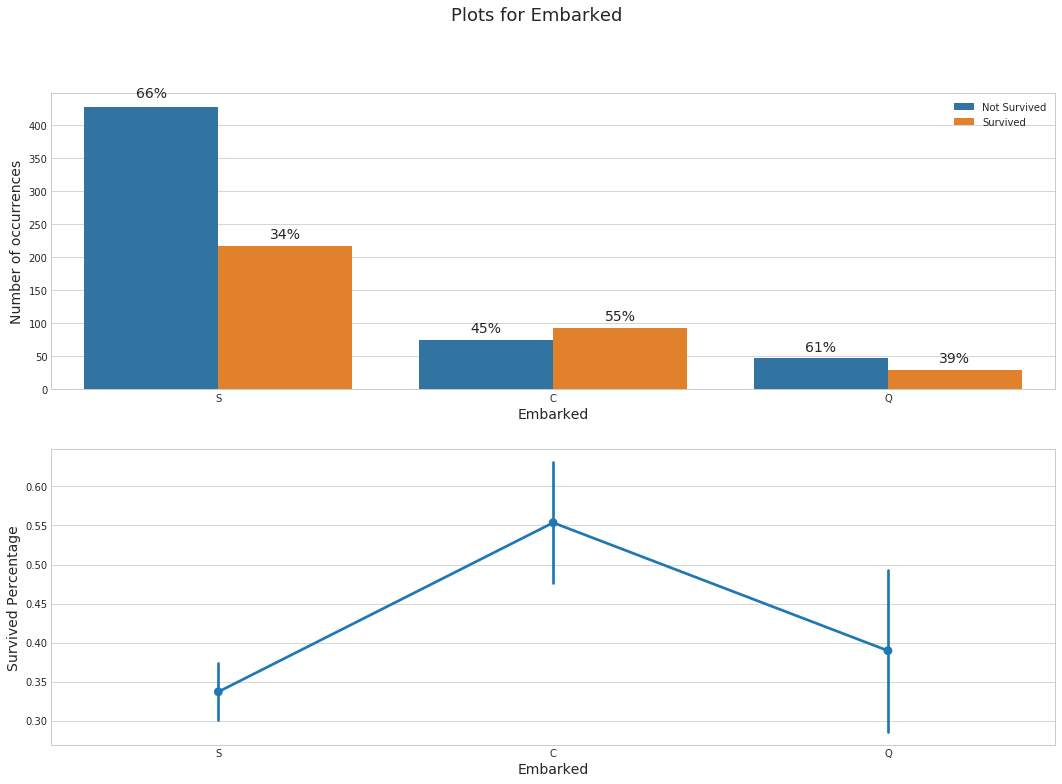

In [10]:
### Plotting Categorical Features
# Looping through and Plotting Categorical features
for column in nominal_features:
    # Figure initiation
    fig = plt.figure(figsize=(18,12))
    
    ### Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(211));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    # Setting Legend location 
    plt.legend(loc=1);
    
    ### Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 

    
    ### Survived percentage for every value of feature
    sns.pointplot(x=column, y='Survived', data=train_data, ax = plt.subplot(212));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Survived Percentage', fontsize=14);
    # Printing Chart
    plt.show()

<b><font size="6">My conclusion :)</font></b>


<img src="https://www.nagarajbhat.com/post/predicting-titanic-survival/featured.jpg" alt="image info" />